In [1]:
%tensorflow_version 1.15.2
import numpy as np
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.15.2`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [2]:
#Network Architecture
encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img,encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]

decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer = 'adadelta', loss='binary_crossentropy')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#Prepare Dataset
(X_train,_),(X_test,_) = mnist.load_data()
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.
X_train = X_train.reshape(len(X_train), np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [4]:
X_test.shape, X_train.shape

((10000, 784), (60000, 784))

In [13]:
autoencoder.fit(X_train, X_train, epochs=50, batch_size=25, validation_data=(X_test,X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2776 - val_loss: 0.2765
Epoch 2/50
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2774 - val_loss: 0.2763
Epoch 3/50
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2772 - val_loss: 0.2761
Epoch 4/50
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2770 - val_loss: 0.2759
Epoch 5/50
60000/60000 [==============================] - 6s 94us/sample - loss: 0.2768 - val_loss: 0.2757
Epoch 6/50
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2766 - val_loss: 0.2755
Epoch 7/50
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2764 - val_loss: 0.2754
Epoch 8/50
60000/60000 [==============================] - 6s 95us/sample - loss: 0.2762 - val_loss: 0.2752
Epoch 9/50
60000/60000 [==============================] - 6s 93us/sample - loss: 0.2760 - val_

In [0]:
encoded_img = encoder.predict(X_test)
decoded_img = decoder.predict(encoded_img)

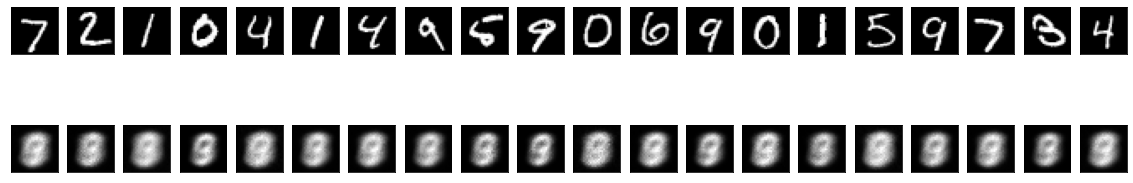

In [15]:
n = 20
plt.figure(figsize=(20,4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_img[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()